In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]#-->2D array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
y_train.shape

(50000,)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

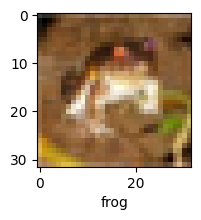

In [ ]:
plot_sample(X_train, y_train, 0)

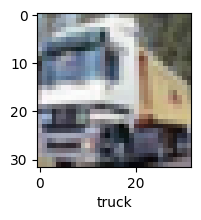

In [ ]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# CNN

In [ ]:
# CNN model, with 6 convolutional layers, 3 pooling layers, and 3 dense layers. Softmax output layer.
model = models.Sequential()

model.add(layers.Conv2D(64, (5,5), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# We augment the training data within the mini-batches to try to reduce generalization error
datagen = ImageDataGenerator(
    horizontal_flip=True,
    channel_shift_range=0.05,
    rotation_range=10,
    validation_split=0.15
)

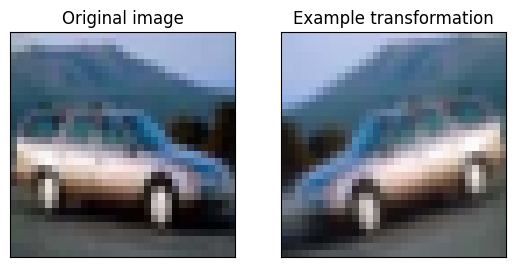

In [ ]:
# An example transformation

img = X_train[4]

fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[0].set_title("Original image")
ax[1].imshow(datagen.apply_transform(img,{'theta':-10,'channel_shift_intensity':0.05,'flip_horizontal':True}))
ax[1].set_title("Example transformation")

for i in range(2):
  ax[i].set_xticks([])
  ax[i].set_yticks([])
plt.show()

In [ ]:
# Train the model, including an early stopping if we can't reduce the loss further

early_stopping = keras.callbacks.EarlyStopping(monitor='loss',patience=10)

training_flow = datagen.flow(X_train, y_train, subset='training')
validation_flow = datagen.flow(X_train, y_train, subset='validation', shuffle=False)

history = model.fit(training_flow,
                    validation_data=validation_flow,
                    callbacks=[early_stopping],
                    epochs=70)

Epoch 1/70
1329/1329 [==============================] - 1287s 966ms/step - loss: 1.6903 - accuracy: 0.3747 - val_loss: 1.4574 - val_accuracy: 0.4681
Epoch 2/70
1329/1329 [==============================] - 1295s 974ms/step - loss: 1.2780 - accuracy: 0.5391 - val_loss: 1.2012 - val_accuracy: 0.5760
Epoch 3/70
1329/1329 [==============================] - 1299s 977ms/step - loss: 1.0748 - accuracy: 0.6173 - val_loss: 1.0059 - val_accuracy: 0.6479
Epoch 4/70
1329/1329 [==============================] - 1318s 992ms/step - loss: 0.9314 - accuracy: 0.6724 - val_loss: 0.8988 - val_accuracy: 0.6867
Epoch 5/70
 961/1329 [====================>.........] - ETA: 5:45 - loss: 0.8646 - accuracy: 0.6971

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 40s 25ms/step - loss: 2.1828 - accuracy: 0.1936
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.7471 - accuracy: 0.3757
Epoch 3/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.5325 - accuracy: 0.4487
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.4115 - accuracy: 0.4948
Epoch 5/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.3262 - accuracy: 0.5297
Epoch 6/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.2589 - accuracy: 0.5564
Epoch 7/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.1929 - accuracy: 0.5806
Epoch 8/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.1424 - accuracy: 0.5983
Epoch 9/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.0897 - accuracy: 0.6207
Epoch 10/10
1563/1563 [==============================] - 41s 26m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.1012 - accuracy: 0.6177


[1.1012343168258667, 0.6176999807357788]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[0]

array([4.9977008e-02, 7.0265271e-03, 1.3398340e-01, 5.1612610e-01,
       6.7959033e-02, 1.1137012e-01, 4.0963363e-02, 1.1676057e-02,
       6.0413342e-02, 5.0505041e-04], dtype=float32)